### 내적
- 가중합
- 가중평균
- 유사도
- 선형회귀 모형
- 제곱합

## 벡터 곱셈

### 가중평균
- 예를 들어 학점을 생각하면 수업시간이 많은 수학은 3 상대적으로 적은 영어는 1일때,  
수학 60점, 영어 100점을 맞았다. 그럼 가중평균은 3/4*60 + 1/4 * 100 = 70

In [9]:
import numpy as np

In [15]:
x = np.arange(10)
N = len(x)
np.ones(N) @ x / N

4.5

In [16]:
x.mean()

4.5

### 유사도(코사인 유사도)
- 벡터가 닮은 정도

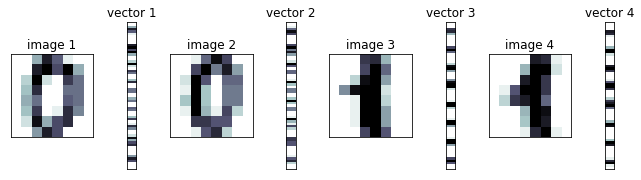

In [18]:
import matplotlib.pylab as plt
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(1, 8, height_ratios=[1],
                       width_ratios=[9, 1, 9, 1, 9, 1, 9, 1])
for i in range(4):
    plt.subplot(gs[2 * i])
    plt.imshow(eval("d" + str(i + 1)), aspect=1,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("image {}".format(i + 1))
    plt.subplot(gs[2 * i + 1])
    plt.imshow(eval("v" + str(i + 1)), aspect=0.25,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("vector {}".format(i + 1))
plt.tight_layout()
plt.show()

In [19]:
#“0” 이미지와 “0” 이미지, 또는 “1” 이미지와 “1” 이미지의 내적값은 다음과 같다.
(v1.T @ v2)[0][0], (v3.T @ v4)[0][0]

(3064.0, 3661.0)

In [20]:
# 상대적으로 “0” 이미지와 “1” 이미지, 또는 “1” 이미지와 “0” 이미지의 내적값은 작다.
(v1.T @ v3)[0][0], (v1.T @ v4)[0][0], (v2.T @ v3)[0][0], (v2.T @ v4)[0][0]

(1866.0, 1883.0, 2421.0, 2479.0)

In [21]:
# 연습문제
#다음 코드를 실행하면 MNIST 숫자 이미지 전체 데이터를 모두 벡터로 변환하여 하나의 넘파이 행렬 X를 만든다. 이 행렬을 이용하여 다음 문제를 풀어라.
from sklearn.datasets import load_digits
X = load_digits().data

In [28]:
# (1) 내적을 이용하여 첫 번째 이미지와 10번째 이미지의 유사도를 구하라.
X[0].T @ X[9]

2807.0

### 선형회귀 모형(linear regression model)
- y = W1X1 + ... +WnXn
- y = w.T @ x
    - 면적(𝑚2)을 입력 데이터 𝑥1라고 한다.
    - 층수를 입력 데이터 𝑥2라고 한다
    - 한강이 보이는지의 여부를 입력 데이터 𝑥3라고 하며 한강이 보이면 𝑥3=1, 보이지 않으면 𝑥3=0이라고 한다.
    - 출력 데이터 𝑦̂ 는 해당 아파트의 예측 가격이다.
    - y = 500x1 + 200x2 + 10000x3

### 제곱합
- X.T @ X

## 행렬 곱셈
- 앞의 행렬의 열의 수와 뒤의 행렬의 행의 수가 같아야됨

In [37]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])
C = A @ B
C

array([[22, 28],
       [49, 64]])

In [41]:
D = B @ A
D

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

In [44]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
C = np.array([[9,8],[7,6]])

In [45]:
A @ B

array([[19, 22],
       [43, 50]])

In [46]:
B @ A #교환법칙 성립 x

array([[23, 34],
       [31, 46]])

In [47]:
A @ (B + C)

array([[42, 42],
       [98, 98]])

In [48]:
A @ B + A @ C # 분배법칙 성립o

array([[42, 42],
       [98, 98]])

In [49]:
A.T + B.T

array([[ 6, 10],
       [ 8, 12]])

In [50]:
(A + B).T

array([[ 6, 10],
       [ 8, 12]])

In [51]:
A.T @ B.T

array([[23, 31],
       [34, 46]])

In [53]:
B.T @ A.T

array([[19, 43],
       [22, 50]])

In [52]:
(A@B).T

array([[19, 43],
       [22, 50]])

### 곱셈의 연결
- ABC = (AB)C = A(BC)
- ABCD = ((AB)C)D = (AB)(CD) = A(BCD) = A(BC)D

In [78]:
A = np.array([[1,2]])
B = np.array([[1,2],[3,4]])
C = np.array([[5],[6]])
(A @ B) @ C

array([[95]])

In [79]:
A @ (B @ C)

array([[95]])

### 항등행렬의 곱셈
- AI = IA = A

In [84]:
A = np.array([[1,2],[3,4]])
I = np.eye(2)
A

array([[1, 2],
       [3, 4]])

In [85]:
A @ I

array([[1., 2.],
       [3., 4.]])

In [86]:
I @ A

array([[1., 2.],
       [3., 4.]])

### 행렬과 벡터의 곱
=> Mv
- 해석방법
    - 열 벡터의 선형조합
        - 앞에 있는 행렬을 열로 쪼개서 보는 방법
    - 행 벡터의 선형조합
        - 앞에 있는 헹렬을 행으로 쪼개서 보는 방법

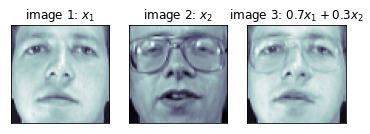

In [90]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

f, ax = plt.subplots(1, 3)

ax[0].imshow(faces.images[6], cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1: $x_1$")

ax[1].imshow(faces.images[10], cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2: $x_2$")

new_face = 0.7 * faces.images[6] + 0.3 * faces.images[10]
ax[2].imshow(new_face, cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3: $0.7x_1 + 0.3x_2$")

plt.show()

# 잔차
- 예측치와 실제값의 차이를 오차 혹은 잔차라고 한다.
- e = y - y*
- e = y - Xw

### 잔차제곱합(RSS)
- 잔차의 크기는 잔차 벡터의 각 원소를 제곱한 후 더한 잔차 제곱합을 이용하여 구한다. e.T @ e
- e.T @ e = (y-Xw).T @ (y-Xw) = 스칼라

### 이차형식
- w.T @ X.T @ X @ w 에서 X는 행렬이므로 X.T @ X 가 정방행렬이 된다. 이 정방행렬을 A라고하면,
w.T @ A @ w <= 이차형식이라고한다.

### 부분행렬
- 관점 3가지
    - 앞에 행렬을 행으로보고 뒤에 행렬을 냅두는방식
    - 앞에 행렬을 냅두고, 뒤에 행렬을 열로 보는방식
    - 앞에 행렬을 열로 보고, 뒤에 행렬을 행으로 보는방식